# PROJECT TEAM ID : PTID-CDS-JUN-23-1549



# Problem Statement

* Task 1:-Create a predictive model which will help the insurance marketing team to know which customer will buy the product.

* Task 2:-Suggestions to the Insurance market team to make  customers  buy the product.


# Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier,IsolationForest
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load data

In [3]:
data = pd.read_csv("train.csv")
df= pd.DataFrame(data)
df.head(pd.set_option("display.max_columns",None))

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [4]:
len(df)

595212

In [5]:
df.target.unique()

array([0, 1], dtype=int64)

# Basic checks

In [6]:
df.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


In [7]:
df.tail()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
595207,1488013,0,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0
595211,1488027,0,0,1,8,0,0,1,0,0,0,0,0,0,0,0,7,1,0,0,0.1,0.2,-1.000000,7,0,-1,0,-1,0,1,0,2,1,34,2,0.400000,0.932649,0.378021,3.741657,0.4,0.0,0.5,2,3,10,4,10,2,5,4,4,3,8,0,1,0,0,0,0


In [8]:
df.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,5.952120e+05,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,7.438036e+05,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,4.293678e+05,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,7.000000e+00,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.719915e+05,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.435475e+05,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.0000

In [9]:
# find the number of unique rows in each features..
df.nunique().sort_values()

ps_calc_20_bin         2
ps_ind_18_bin          2
ps_ind_17_bin          2
ps_ind_16_bin          2
ps_calc_19_bin         2
ps_car_08_cat          2
ps_ind_13_bin          2
ps_ind_12_bin          2
ps_ind_11_bin          2
ps_ind_09_bin          2
ps_ind_10_bin          2
ps_ind_07_bin          2
ps_ind_06_bin          2
ps_calc_15_bin         2
ps_calc_16_bin         2
ps_calc_17_bin         2
ps_calc_18_bin         2
target                 2
ps_ind_08_bin          2
ps_car_03_cat          3
ps_car_10_cat          3
ps_car_05_cat          3
ps_car_02_cat          3
ps_car_07_cat          3
ps_ind_04_cat          3
ps_ind_02_cat          5
ps_ind_14              5
ps_car_11              5
ps_calc_04             6
ps_car_09_cat          6
ps_calc_05             7
ps_calc_09             8
ps_ind_05_cat          8
ps_ind_01              8
ps_calc_07            10
ps_calc_02            10
ps_calc_03            10
ps_calc_01            10
ps_car_04_cat         10
ps_reg_01             10


In [10]:
## Getting the column names
df.columns

Index(['id', 'target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin'],


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 595212 entries, 0 to 595211
Data columns (total 59 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              595212 non-null  int64  
 1   target          595212 non-null  int64  
 2   ps_ind_01       595212 non-null  int64  
 3   ps_ind_02_cat   595212 non-null  int64  
 4   ps_ind_03       595212 non-null  int64  
 5   ps_ind_04_cat   595212 non-null  int64  
 6   ps_ind_05_cat   595212 non-null  int64  
 7   ps_ind_06_bin   595212 non-null  int64  
 8   ps_ind_07_bin   595212 non-null  int64  
 9   ps_ind_08_bin   595212 non-null  int64  
 10  ps_ind_09_bin   595212 non-null  int64  
 11  ps_ind_10_bin   595212 non-null  int64  
 12  ps_ind_11_bin   595212 non-null  int64  
 13  ps_ind_12_bin   595212 non-null  int64  
 14  ps_ind_13_bin   595212 non-null  int64  
 15  ps_ind_14       595212 non-null  int64  
 16  ps_ind_15       595212 non-null  int64  
 17  ps_ind_16_

In [12]:
df.shape

(595212, 59)

# Data Preprocessing 

In [13]:
df.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

### Checking for null values

In [14]:
df.isnull().sum()

id                0
target            0
ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0


### conversion of categorical columns in to numerical columns
* we do not have any categorical data in the data set
* So this step  can be excluded

### checking for outliers

In [15]:
box = [['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03',
       'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin',
       'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin',
       'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15',
       'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01',
       'ps_reg_02', 'ps_reg_03', 'ps_car_01_cat', 'ps_car_02_cat',
       'ps_car_03_cat', 'ps_car_04_cat', 'ps_car_05_cat', 'ps_car_06_cat',
       'ps_car_07_cat', 'ps_car_08_cat', 'ps_car_09_cat', 'ps_car_10_cat',
       'ps_car_11_cat', 'ps_car_11', 'ps_car_12', 'ps_car_13', 'ps_car_14',
       'ps_car_15', 'ps_calc_01', 'ps_calc_02', 'ps_calc_03', 'ps_calc_04',
       'ps_calc_05', 'ps_calc_06', 'ps_calc_07', 'ps_calc_08', 'ps_calc_09',
       'ps_calc_10', 'ps_calc_11', 'ps_calc_12', 'ps_calc_13', 'ps_calc_14',
       'ps_calc_15_bin', 'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin',
       'ps_calc_19_bin', 'ps_calc_20_bin']]


# find the outliers.(IQR,Z-SCORE ,EMPERICAL RULE any one use.)
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
print(iqr)

# calulate the outlier percentage..
outlier = ((df>upper) | (df<lower)).sum()
d= (outlier/ len(df)) * 100
print('\nPercentage of outliers:\n',d)

In [16]:
import pandas as pd
import numpy as np

# Calculate the IQR, upper bound, and lower bound
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
upper = q3 + (1.5 * iqr)
lower = q1 - (1.5 * iqr)
print(iqr) 




id                743557.250000
target                 0.000000
ps_ind_01              3.000000
ps_ind_02_cat          1.000000
ps_ind_03              4.000000
ps_ind_04_cat          1.000000
ps_ind_05_cat          0.000000
ps_ind_06_bin          1.000000
ps_ind_07_bin          1.000000
ps_ind_08_bin          0.000000
ps_ind_09_bin          0.000000
ps_ind_10_bin          0.000000
ps_ind_11_bin          0.000000
ps_ind_12_bin          0.000000
ps_ind_13_bin          0.000000
ps_ind_14              0.000000
ps_ind_15              5.000000
ps_ind_16_bin          1.000000
ps_ind_17_bin          0.000000
ps_ind_18_bin          0.000000
ps_reg_01              0.500000
ps_reg_02              0.400000
ps_reg_03              0.475000
ps_car_01_cat          4.000000
ps_car_02_cat          0.000000
ps_car_03_cat          1.000000
ps_car_04_cat          0.000000
ps_car_05_cat          2.000000
ps_car_06_cat         10.000000
ps_car_07_cat          0.000000
ps_car_08_cat          0.000000
ps_car_0

In [17]:
# Here we drop the id coloum
df.drop(["id"],axis=1,inplace=True)

In [18]:
# Replace outliers with the median
df_no_outliers = df.copy()
for columns in df.columns:
    is_outlier = (df[columns] < lower[columns]) | (df[columns] > upper[columns])
    df_no_outliers.loc[is_outlier, columns] = df[columns].median()

# Print the updated DataFrame
print(df_no_outliers)

        target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  \
0            0          2              2          5              1   
1            0          1              1          7              0   
2            0          5              1          9              1   
3            0          0              1          2              0   
4            0          0              2          0              1   
...        ...        ...            ...        ...            ...   
595207       0          3              1         10              0   
595208       0          5              1          3              0   
595209       0          1              1         10              0   
595210       0          5              2          3              1   
595211       0          0              1          8              0   

        ps_ind_05_cat  ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  \
0                   0              0              1              0   
1                  

In [19]:
len(df)

595212

In [20]:
df.describe()

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000,595212.000000
mean,0.036448,1.900378,1.358943,4.423318,0.416794,0.405188,0.393742,0.257033,0.163921,0.185304,0.000373,0.001692,0.009439,0.000948,0.012451,7.299922,0.660823,0.121081,0.153446,0.610991,0.439184,0.551102,8.295933,0.829931,-0.504899,0.725192,-0.157732,6.555340,0.910027,0.832080,1.328890,0.992136,62.215674,2.346072,0.379945,0.813265,0.276256,3.065899,0.449756,0.449589,0.449849,2.372081,1.885886,7.689445,3.005823,9.225904,2.339034,8.433590,5.441382,1.441918,2.872288,7.539026,0.122427,0.627840,0.554182,0.287182,0.349024,0.153318
std,0.187401,1.983789,0.664594,2.699902,0.493311,1.350642,0.488579,0.436998,0.370205,0.388544,0.019309,0.041097,0.096693,0.030768,0.127545,3.546042,0.473430,0.326222,0.360417,0.287643,0.404264,0.793506,2.508270,0.375716,0.788654,2.153463,0.844417,5.501445,0.347106,0.373796,0.978747,0.091619,33.012455,0.832548,0.058327,0.224588,0.357154,0.731366,0.287198,0.286893,0.287153,1.117219,1.134927,1.334312,1.414564,1.459672,1.246949,2.904597,2.332871,1.202963,1.694887,2.746652,0.327779,0.483381,0.497056,0.452447,0.476662,0.360295
min,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,1.000000,-1.000000,-1.000000,0.250619,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.400000,0.200000,0.525000,7.000000,1.000000,-1.000000,0.000000,-1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,32.000000,2.000000,0.316228,0.670867,0.333167,2.828427,0.200000,0.200000,0.200000,2.000000,1.000000,7.000000,2.000000,8.000000,1.000000,6.000000,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,0.000000,0.700000,0.300000,0.720677,7.000000,1.000000,-1.000000,0.000000,0.000000,7.000000,1.000000,1.000000,2.000000,1.000000,65.000000,3.000000,0.374166,0.765811,0.368

In [21]:
c = df.corr()
c

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
target,1.000000,0.018570,0.004534,0.008360,0.009360,0.029165,-0.034017,0.034218,0.013147,-0.008237,0.001815,0.002028,0.007810,0.002460,0.007443,-0.021506,-0.027778,0.037053,0.004555,0.022888,0.034800,0.030888,0.016256,-0.031534,0.032401,0.032900,0.020754,0.011537,-0.036395,-0.020342,0.005322,0.001038,0.006129,-0.001213,0.038790,0.053899,-0.004474,0.027667,0.001782,0.001360,0.001907,3.272046e-05,0.000771,0.000082,-0.000103,-0.001006,0.000719,1.060834e-03,0.000371,-0.001133,-0.000446,0.001362,-0.000490,0.000624,-0.000170,0.000552,-0.001744,-0.001072
ps_ind_01,0.018570,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,-0.016727,-0.023406,-0.008776,-0.024971,0.122137,0.036896,0.101257,-0.112226,0.102212,0.183855,0.139125,-0.056121,-0.116987,0.043756,0.079042,0.213009,0.070192,-0.000639,0.138112,-0.102582,0.010794,0.008188,0.008252,0.161842,0.099752,0.034480,-0.056722,-0.000854,-0.000437,0.001214,-9.430788e-04,-0.001171,0.000147,-0.000658,0.002993,-0.000085,-1.344982e-03,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,0.004534,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,0.000772,-0.004616,-0.001187,-0.003649,-0.003854,0.012682,-0.018727,-0.000374,0.061118,0.084260,0.070790,0.002149,0.045233,-0.002532,-0.072190,-0.008407,-0.017301,-0.011781,0.001526,0.009435,0.011401,0.014955,0.019949,-0.110247,-0.080408,-0.012272,-0.008391,0.000683,0.000932,-0.000322,-2.111049e-03,-0.001548,0.000085,-0.000172,-0.002712,0.000356,-2.542520e-05,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,0.008360,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,-0.003986,0.001698,0.003929,0.001990,0.170449,-0.018251,0.027691,0.001316,0.003209,0.048338,0.002348,-0.028520,-0.044907,0.095658,0.072990,0.143597,0.008021,0.056337,0.003607,-0.013205,-0.008561,-0.025966,-0.059358,0.088992,0.048308,0.000539,-0.048096,0.000703,-0.000335,0.000177,7.029223e-04,-0.001245,0.002361,0.001533,0.001267,-0.001544,2.302873e-04,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.009360,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,0.001018,-0.001217,-0.000893,-0.000691,0.077071,0.017497,0.007830,-0.025797,0.023846,0.079471,0.065702,0.029379,0.003162,0.022744,-0.045361,0.063399,0.025324,0.064655,-0.008148,-0.041983,0.023010,-0.000615,0.073486,-0.095160,-0.032233,-0.005596,0.040480,-0.002753,-0.000544,0.000270,8.255181e-04,0.001028,0.002626,-0.000151,-0.002776,0.000487,1.272742e-04,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.029165,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,-0.005069,0.001742,-0.000636,-0.001831,0.001313,-0.001013,0.012326,0.004315,0.007163,-0.008252,-0.017836,-0.009124,-0.019510,-0.036213,0.012879,-0.011399,-0.010873,-0.006562,-0.007230,0.053777,-0.002084,-0.008334,0.002168,-0.002250,0.001076,-0.016302,-0.015259,-0.001427,-0.006629,-0.001739,0.002379,-0.001560,1.291697e-03,-0.000642,-0.000249,-0.001902,-0.00

## 7) feature engineering..

* 1)scaling
* 2)encorder concept-no need.because all the columns have numerical data.


In [22]:
df.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

Text(0, 0.5, 'class')

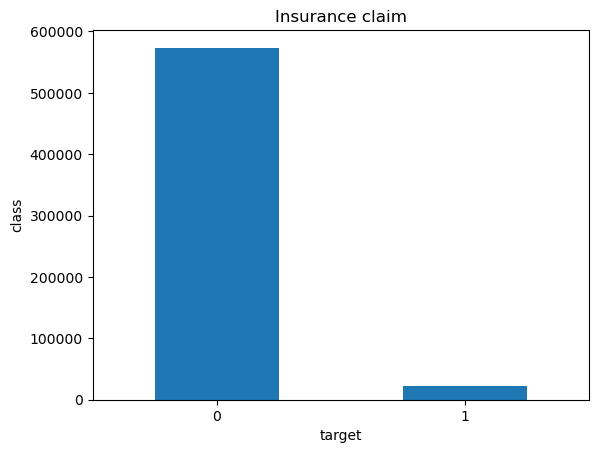

In [23]:
count_target = pd.value_counts(df['target'] , sort = True )

count_target.plot(kind = "bar" , rot = 0)

plt.title("Insurance claim")

plt.xlabel("target")
plt.ylabel("class")

## 8) PCA

In [24]:
x=df.drop(["target"],axis=1)
x

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,2,2,5,1,0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10,1,-1,0,1,4,1,0,0,1,12,2,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,1,1,7,0,0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11,1,-1,0,-1,11,1,1,2,1,19,3,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,5,4,9,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,-1.000000,7,1,-1,0,-1,14,1,1,2,1,60,1,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,0,1,2,0,0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7,1,0,0,1,11,1,1,3,1,104,1,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,0,2,0,1,0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11,1,-1,0,-1,14,1,1,2,1,82,3,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,3,1,10,0,0,0,0,0,1,0,0,0,0,0,13,1,0,0,0.5,0.3,0.692820,10,1,-1,0,1,1,1,1,0,1,31,3,0.374166,0.684631,0.385487,2.645751,0.4,0.5,0.3,3,0,9,0,9,1,12,4,1,9,6,0,1,1,0,1,1
595208,5,1,3,0,0,0,0,0,1,0,0,0,0,0,6,1,0,0,0.9,0.7,1.382027,9,1,-1,0,-1,15,0,0,2,1,63,2,0.387298,0.972145,-1.000000,3.605551,0.2,0.2,0.0,2,4,8,6,8,2,12,4,1,3,8,1,0,1,0,1,1
595209,1,1,10,0,0,1,0,0,0,0,0,0,0,0,12,1,0,0,0.9,0.2,0.659071,7,1,-1,0,-1,1,1,1,2,1,31,3,0.397492,0.596373,0.398748,1.732051,0.4,0.0,0.3,3,2,7,4,8,0,10,3,2,2,6,0,0,1,0,0,0
595210,5,2,3,1,0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.9,0.4,0.698212,11,1,-1,0,-1,11,1,1,2,1,101,3,0.374166,0.764434,0.384968,3.162278,0.0,0.7,0.0,4,0,9,4,9,2,11,4,1,4,2,0,1,1,1,0,0


In [25]:
y=df.target
y

0         0
1         0
2         0
3         0
4         0
         ..
595207    0
595208    0
595209    0
595210    0
595211    0
Name: target, Length: 595212, dtype: int64

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_data=scaler.fit_transform(x)
scaled_data

array([[ 0.0502179 ,  0.9645855 ,  0.21359383, ..., -0.63472992,
        -0.73222528,  2.34997253],
       [-0.45386836, -0.54009356,  0.95436209, ..., -0.63472992,
         1.36569991, -0.42553689],
       [ 1.56247669,  3.9739436 ,  1.69513035, ..., -0.63472992,
         1.36569991, -0.42553689],
       ...,
       [-0.45386836, -0.54009356,  2.06551448, ..., -0.63472992,
        -0.73222528, -0.42553689],
       [ 1.56247669,  0.9645855 , -0.52717443, ...,  1.57547323,
        -0.73222528, -0.42553689],
       [-0.95795462, -0.54009356,  1.32474622, ..., -0.63472992,
        -0.73222528, -0.42553689]])

In [27]:
## creating new dataframe
dm =pd.DataFrame(data=scaled_data, columns= x.columns)

In [28]:
dm.head()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,0.050218,0.964585,0.213594,1.182227,-0.299997,-0.805893,1.700163,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.043440,-1.395821,2.694238,-0.425746,0.309442,-0.591654,0.210419,0.679380,0.452653,-0.627780,-0.336757,1.371044,-0.464486,0.259209,-2.226032,-1.357747,0.085839,-1.521114,-0.415678,0.343841,0.313526,0.264742,0.737869,0.523136,0.175713,-0.870090,0.562038,-0.780567,1.731646,-1.417981,0.530322,-1.073849,-1.182124,1.525425,-0.367359,1.255372,0.167831,-0.373505,0.769910,0.896917,-0.634730,-0.732225,2.349973
1,-0.453868,-0.540094,0.954362,-0.844892,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,-1.212598,-1.395821,-0.371162,2.348817,0.657096,-0.096928,0.270919,1.078061,0.452653,-0.627780,-0.336757,-0.997456,0.807908,0.259209,0.449230,0.685684,0.085839,-1.309073,0.785455,-1.092413,-0.865800,0.314877,-0.842820,-0.521440,-1.218534,-0.521844,-0.333042,-0.780567,0.982196,1.409748,-0.839850,-1.073849,-0.493559,-1.046515,-0.367359,-1.104669,0.531911,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
2,1.562477,3.973944,1.695130,1.182227,-0.299997,-0.805893,-0.588179,2.258425,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,1.325445,0.716424,-0.371162,-0.425746,-2.124135,-1.086380,-1.954747,-0.516665,0.452653,-0.627780,-0.336757,-0.997456,1.353220,0.259209,0.449230,0.685684,0.085839,-0.067116,-1.616811,-1.092413,-0.764418,0.198847,0.342818,0.174944,0.872836,-1.218337,-0.333042,0.100547,0.982196,-1.417981,-0.839850,-0.271891,-0.493559,-0.617858,0.463923,2.435393,-0.196249,-0.373505,0.769910,0.896917,-0.634730,1.365700,-0.425537
3,-0.957955,-0.540094,-0.897559,-0.844892,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,0.197425,0.716424,-0.371162,-0.425746,1.004750,-0.591654,0.037612,-0.516665,0.452653,0.640204,-0.336757,1.371044,0.807908,0.259209,0.449230,1.707399,0.085839,1.265715,-1.616811,-0.099081,-1.203608,0.052362,-1.457410,0.523136,1.569960,-1.218337,-0.333042,1.862777,-0.516705,-1.417981,-0.839850,1.332025,-2.214970,-1.475171,0.463923,0.665362,0.531911,-0.373505,-1.298852,-1.114930,-0.634730,-0.732225,-0.425537
4,-0.957955,0.964585,-1.638327,1.182227,-0.299997,1.240860,-0.588179,-0.442786,-0.476919,-0.019316,-0.041167,-0.097615,-0.030797,-0.097621,0.479430,0.716424,-0.371162,-0.425746,0.309442,0.397799,0.365035,1.078061,0.452653,-0.627780,-0.336757,-0.997456,1.353220,0.259209,0.449230,0.685684,0.085839,0.599299,0.785455,-1.095124,-1.101721,0.248762,-1.457410,-0.173248,0.524274,-1.566584,-0.333042,0.100547,-1.266155,-0.004117,0.530322,-0.271891,1.227851,-1.046515,-0.367359,-1.104669,-1.652569,-0.373505,-1.298852,-1.114930,1.575473,1.365700,-0.425537


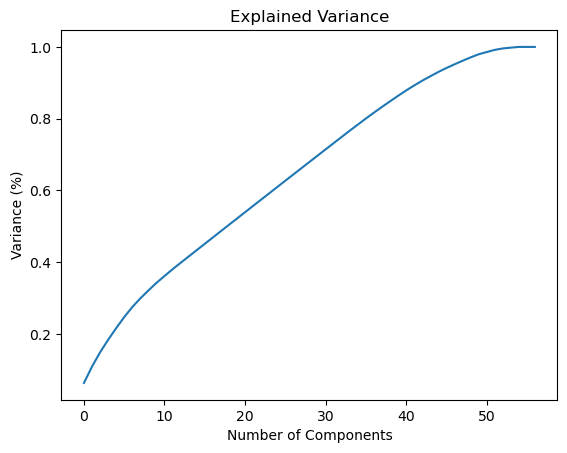

In [29]:
## getting the optimal number of pca
from sklearn.decomposition import PCA

# Initialize the PCA object
pca = PCA()
principalComponents = pca.fit_transform(dm)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
           #np.cumcum - Returns the cumulative sum of the elements along a given axis.
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

* From the diagram , we can see the sree plot this plot is used to find the optimal number of principal components to be considered . in the x label we can see the number of components, 
* for 1 pc , we are getting around 5% of the variance 
* for 2 pc , we are getting around 38% of the variance 
* for 3 pc, we are getting around 50% of the variance 
* for 4 pc, we are getting around 75% of the variance 
* for 5 pc , we are getting around 90% of the variance 

* From the diagram above, it can be seen that 5 principal components explain almost 90% of the variance in data.

* So, instead of giving all the columns as input, we’d only feed these 5 principal components of the data to the machine learning algorithm and we’d obtain a similar result.

In [30]:
from sklearn.decomposition import PCA

# Create an instance of PCA
pca = PCA(n_components=5)

# Fit PCA to the input data and transform it
pca_transformed = pca.fit_transform(dm)

# Print the shape of the transformed data
print("New features shape:", pca_transformed.shape)


# This will be the new data fed to the algorithm.
principal_Df = pd.DataFrame(data = pca_transformed
             , columns = ['pc1', 'pc2','pc3','pc4','pc5'])


New features shape: (595212, 5)


In [31]:
## new pca dataframe
principal_Df.head()

,pc1,pc2,pc3,pc4,pc5
0,1.368276,-0.004084,-0.400392,-0.152878,-0.498953
1,-0.870784,0.998623,0.879730,-1.011378,-2.050196
2,-1.775525,-0.768372,-1.246573,3.048760,0.537380
3,-1.652246,0.134830,0.485287,0.103200,0.514587
4,-1.910849,-0.431270,1.577612,-1.290216,0.831734


Here, we see that earlier we had 6 columns in the data earlier. Now with the help of Scree plot and PCA, we have reduced the number of features to be used for model building to 5. This is the advantage of PCA. _It drastically reduces the number of features, thereby considerably reducing the training time for the model._

In [32]:
principal_Df

,pc1,pc2,pc3,pc4,pc5
0,1.368276,-0.004084,-0.400392,-0.152878,-0.498953
1,-0.870784,0.998623,0.879730,-1.011378,-2.050196
2,-1.775525,-0.768372,-1.246573,3.048760,0.537380
3,-1.652246,0.134830,0.485287,0.103200,0.514587
4,-1.910849,-0.431270,1.577612,-1.290216,0.831734
...,...,...,...,...,...
595207,-0.785565,-1.286643,0.851974,2.395859,0.238842
595208,1.559824,-0.911077,1.396220,-0.948419,0.993492
595209,-2.152077,-0.606393,0.808270,0.138736,0.801834
595210,0.064718,-1.375877,1.315953,0.839729,0.783107


# Model Creation

In [33]:
X = principal_Df
y = df.target

In [34]:
# Here we use SMOTEIomek which is a method of imblearn .SMOTETomek is a hybrid method
# which uses an under sampling method(Tomek) in with an oversampling method(SMOTE)
# Implementing oversampling to balance unbalanced data

from imblearn.combine import SMOTETomek
smk =SMOTETomek(random_state = 42)
X_smk,y_smk =smk.fit_resample(X, y)

In [35]:
X.shape

(595212, 5)

In [36]:
y.shape

(595212,)

In [37]:
X_smk.shape , y_smk.shape

((1141620, 5), (1141620,))

In [38]:
y.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [39]:
y_smk.value_counts()

0    570810
1    570810
Name: target, dtype: int64

In [40]:
from collections import Counter
print(f'Before over sampling : {Counter(y)}')
print(f'After over sampling : {Counter(y_smk)}')

Before over sampling : Counter({0: 573518, 1: 21694})
After over sampling : Counter({0: 570810, 1: 570810})


# Model Evaluation

# Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_smk,y_smk)

LogisticRegression()

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_smk, y_smk, test_size=0.2, random_state=42)


In [43]:
y_pred = LR.predict(X_test)


In [44]:
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [45]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.5727431194267795


In [46]:

from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report,roc_auc_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)


Precision: 0.5821063657384533
Recall: 0.5159628977586252
F1 Score: 0.5470425177253923
ROC AUC: 0.5727475960677352


In [47]:
cm=confusion_matrix(y_test,y_pred) 
cm

array([[71863, 42290],
       [55263, 58908]], dtype=int64)

In [48]:
pd.crosstab(y_test,y_pred)

col_0,0,1
target,,
0,71863,42290
1,55263,58908


In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.63      0.60    114153
           1       0.58      0.52      0.55    114171

    accuracy                           0.57    228324
   macro avg       0.57      0.57      0.57    228324
weighted avg       0.57      0.57      0.57    228324



In [50]:
y_test.value_counts()

1    114171
0    114153
Name: target, dtype: int64

# knn

In [51]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_smk,y_smk)

KNeighborsClassifier()

In [52]:
y_pred1 = KNN.predict(X_test)

In [53]:
y_pred1

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [54]:
y_test.values

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [55]:
acc1 = accuracy_score(y_test,y_pred1)
acc1

0.9243531122440042

In [56]:
precision = precision_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
f1 = f1_score(y_test, y_pred1)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8701684685028842
Recall: 0.9975562971332474
F1 Score: 0.9295181509532514


In [57]:
cm1=confusion_matrix(y_test,y_pred1) 
cm1

array([[ 97160,  16993],
       [   279, 113892]], dtype=int64)

In [58]:
pd.crosstab(y_test,y_pred1)

col_0,0,1
target,,
0,97160,16993
1,279,113892


In [59]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92    114153
           1       0.87      1.00      0.93    114171

    accuracy                           0.92    228324
   macro avg       0.93      0.92      0.92    228324
weighted avg       0.93      0.92      0.92    228324



# Decision tree

In [60]:
dt = DecisionTreeClassifier()     # Object creation for decision tree
dt.fit(X_smk,y_smk)
y_pred2=dt.predict(X_test)
y_pred2

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [61]:
acc2 = accuracy_score(y_test,y_pred2)
acc2

1.0

In [62]:
precision = precision_score(y_test, y_pred2)
recall = recall_score(y_test, y_pred2)
f1 = f1_score(y_test, y_pred2)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [63]:
cm2=confusion_matrix(y_test,y_pred2) 
cm2

array([[114153,      0],
       [     0, 114171]], dtype=int64)

In [64]:
pd.crosstab(y_test,y_pred2)

col_0,0,1
target,,
0,114153,0
1,0,114171


In [65]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114153
           1       1.00      1.00      1.00    114171

    accuracy                           1.00    228324
   macro avg       1.00      1.00      1.00    228324
weighted avg       1.00      1.00      1.00    228324



# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf=RandomForestClassifier()


In [68]:
rf.fit(X_smk,y_smk)


RandomForestClassifier()

In [69]:

y_pred3=dt.predict(X_test)
y_pred3

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [70]:
acc3 = accuracy_score(y_test,y_pred3)
acc3

1.0

In [71]:
precision = precision_score(y_test, y_pred3)
recall = recall_score(y_test, y_pred3)
f1 = f1_score(y_test, y_pred3)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [72]:
cm3=confusion_matrix(y_test,y_pred3) 
cm3

array([[114153,      0],
       [     0, 114171]], dtype=int64)

In [73]:
pd.crosstab(y_test,y_pred3)

col_0,0,1
target,,
0,114153,0
1,0,114171


In [74]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114153
           1       1.00      1.00      1.00    114171

    accuracy                           1.00    228324
   macro avg       1.00      1.00      1.00    228324
weighted avg       1.00      1.00      1.00    228324



# Gradient boosting

In [75]:
gb = GradientBoostingClassifier()


In [76]:
gb.fit(X_smk, y_smk)


GradientBoostingClassifier()

In [77]:
y_pred4 = gb.predict(X_test)
y_pred4

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [78]:
acc4 = accuracy_score(y_test,y_pred4)
acc4

0.5872269231443037

In [79]:
precision = precision_score(y_test, y_pred4)
recall = recall_score(y_test, y_pred4)
f1 = f1_score(y_test, y_pred4)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.5858340441296838
Recall: 0.5955627961566422
F1 Score: 0.590658362216489


In [81]:
pd.crosstab(y_test,y_pred4)

col_0,0,1
target,,
0,66082,48071
1,46175,67996


In [82]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.59      0.58      0.58    114153
           1       0.59      0.60      0.59    114171

    accuracy                           0.59    228324
   macro avg       0.59      0.59      0.59    228324
weighted avg       0.59      0.59      0.59    228324

